Este notebook lo creamos para intentar crear el dataset de modelos rotados obteniendo los respectivos valores del DPDist, y etiquetar cada uno de esos valores con ángulos de rotación

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Proyecto de grado-Extensión/Registro de Nubes/')
!pwd

Mounted at /content/drive
/content/drive/MyDrive/Proyecto de grado-Extensión/Registro de Nubes


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

#Funciones de meustreo y normalización.

In [ ]:
def pc_normalize(pc):
    l = pc.shape[0]
    centroid = np.mean(pc, axis=0)
    #centroid = np.mean(pc)
    #print(centroid.shape)
    pc = pc - centroid
    m = np.max(np.sqrt(np.sum(pc**2, axis=1)))
    #m = np.max(np.sqrt(np.sum(pc**2)))
    pc = pc / m
    return pc

In [ ]:
def muestro_resimple(pointCloudA, pointCloudB, num_points=64, num_batches=16, isNormalized=True):
  #muestreo simple de datos
  pcA = pointCloudA[0:num_points*num_batches, :]
  pcB = pointCloudB[0:num_points*num_batches, :]
    #normalizacion
  if (isNormalized == False):  
    pcA = pc_normalize(pcA)
    pcB = pc_normalize(pcB)

  return pcA, pcB


#Funciones de Rotación

In [ ]:
def X_axis_rotation_matrix(theta):
    return np.array([[1,             0,              0],
                     [0, np.cos(theta), -np.sin(theta)],
                     [0, np.sin(theta),  np.cos(theta)]])

In [ ]:
def Y_axis_rotation_matrix(theta):
    return np.array([[np.cos(theta),  0,  np.sin(theta)],
                     [0,              1,              0],
                     [-np.sin(theta), 0,  np.cos(theta)]])

In [ ]:
def Z_axis_rotation_matrix(theta):
    return np.array([[np.cos(theta),   -np.sin(theta),    0],
                     [np.sin(theta),    np.cos(theta),    0],
                     [0,                0,                1]])

#Cargar modelo

In [ ]:
ptts = np.loadtxt('./data/table/table_0008.txt', delimiter=',', usecols=(0,1,2))

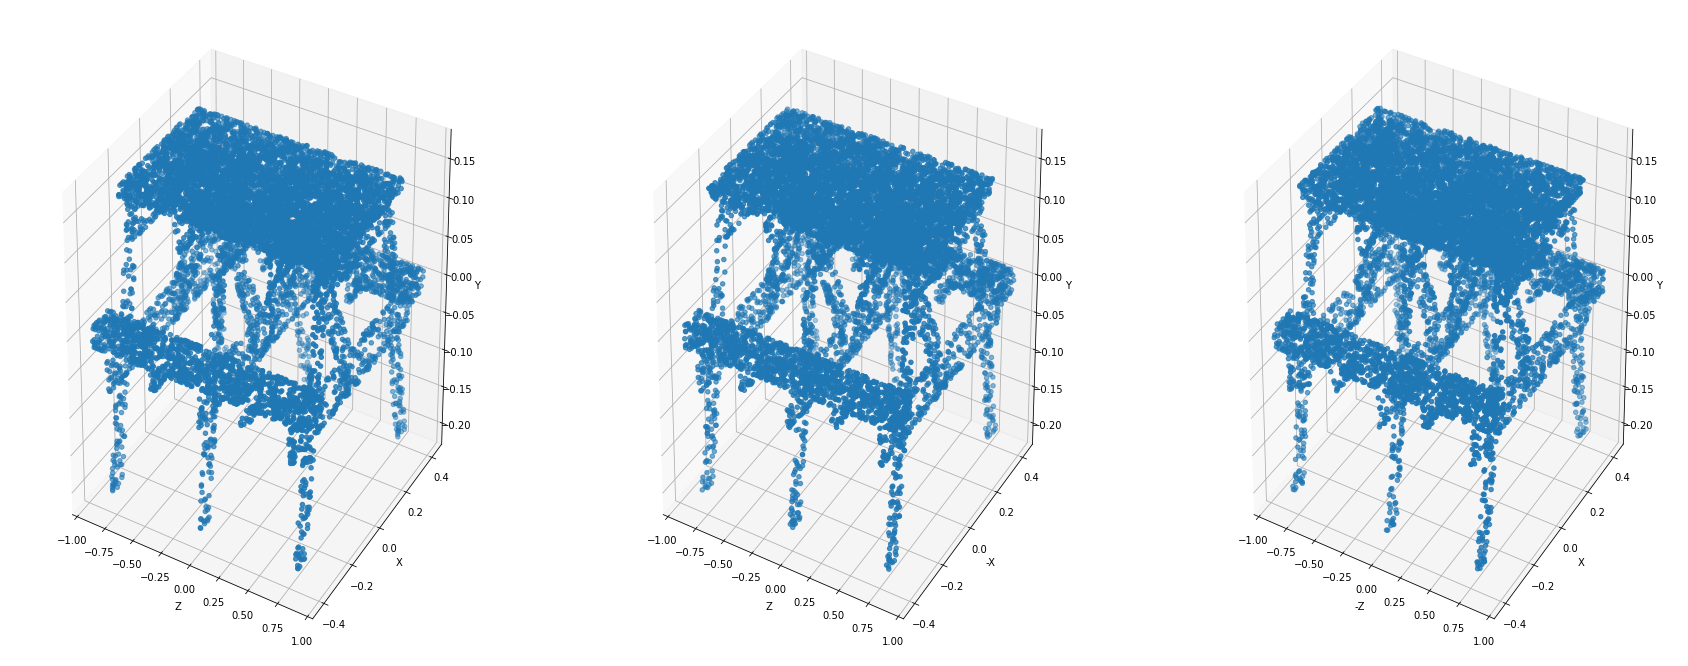

In [ ]:
fig = plt.figure(figsize=(30,12))


ax = fig.add_subplot(1, 3, 1, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]

ax.scatter3D(Z,X,Y)
ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')


ax = fig.add_subplot(1, 3, 2, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]

ax.scatter3D(Z,-X,Y)
ax.set_xlabel('Z')
ax.set_ylabel('-X')
ax.set_zlabel('Y')


ax = fig.add_subplot(1, 3, 3, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]
ax.scatter3D(-Z,X,Y)
ax.set_xlabel('-Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')

plt.show()

In [ ]:
#Retorna nube normalizada y centrada
ptts,_ = muestro_resimple(ptts,ptts)

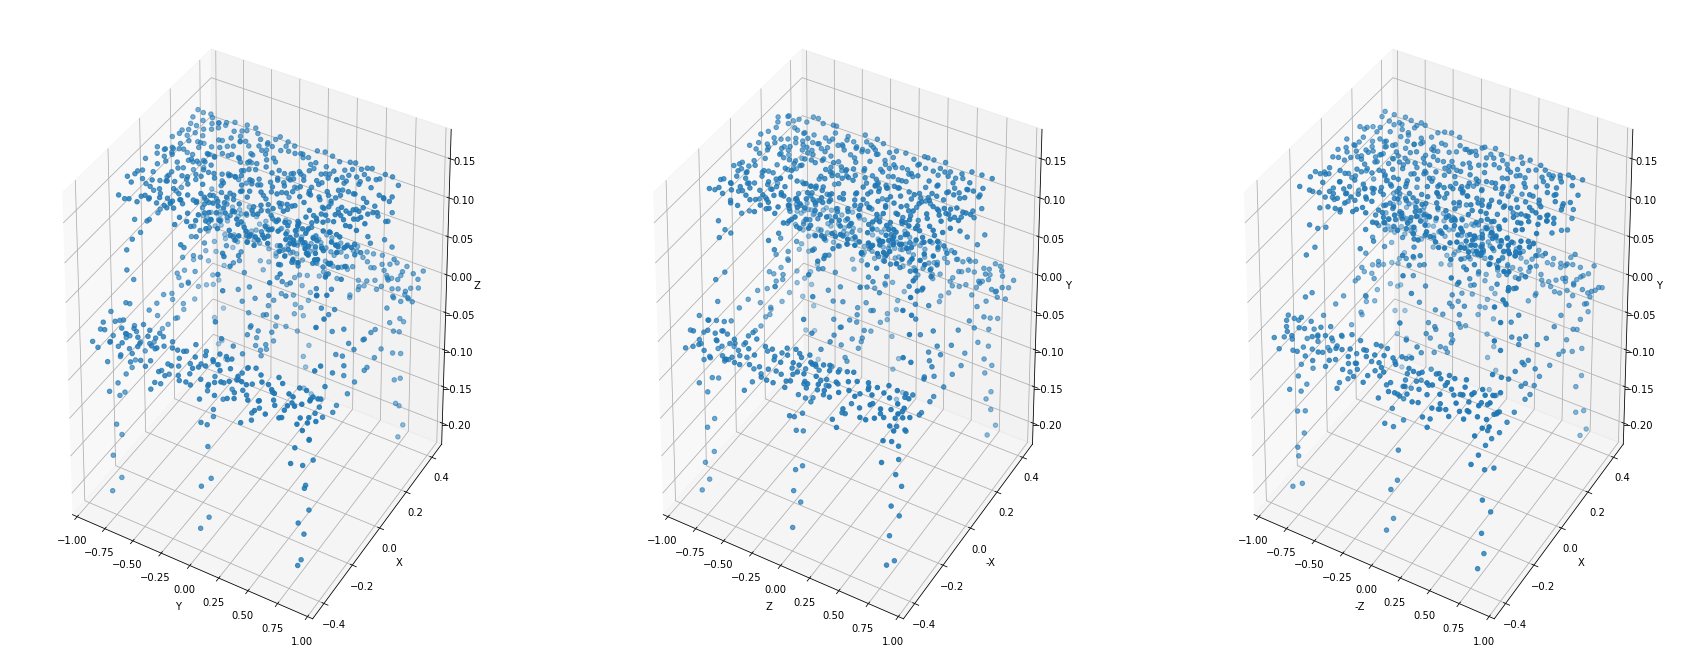

In [ ]:
fig = plt.figure(figsize=(30,12))


ax = fig.add_subplot(1, 3, 1, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]

ax.scatter3D(Z,X,Y)
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_zlabel('Z')


ax = fig.add_subplot(1, 3, 2, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]

ax.scatter3D(Z,-X,Y)
ax.set_xlabel('Z')
ax.set_ylabel('-X')
ax.set_zlabel('Y')


ax = fig.add_subplot(1, 3, 3, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]
ax.scatter3D(-Z,X,Y)
ax.set_xlabel('-Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')

plt.show()

# Generación del Dataset

In [ ]:
modelos=[]
angulos=[]
initial_angle = 0
final_angle = (np.pi)/2

#Se recomienda revisar la distancia entre ángulos en caso de que algo no funcione.

for angle_x in np.arange(initial_angle, final_angle, 0.1): #Cogí pasos de 0.1 radianes porque si no se explota otra vez :(
  for angle_y in np.arange(0, (np.pi)*2, 0.1):
    for angle_z in np.arange(0, (np.pi)*2, 0.1):

      modelo_rotado = np.dot(X_axis_rotation_matrix(angle_x),ptts.T).T
      modelo_rotado = np.dot(Y_axis_rotation_matrix(angle_y),modelo_rotado.T).T
      modelo_rotado = np.dot(Z_axis_rotation_matrix(angle_z),modelo_rotado.T).T

      modelos.append(modelo_rotado)
      angulos.append([angle_x, angle_y, angle_z])

print(len(modelos))
print(len(angulos))

63504
63504


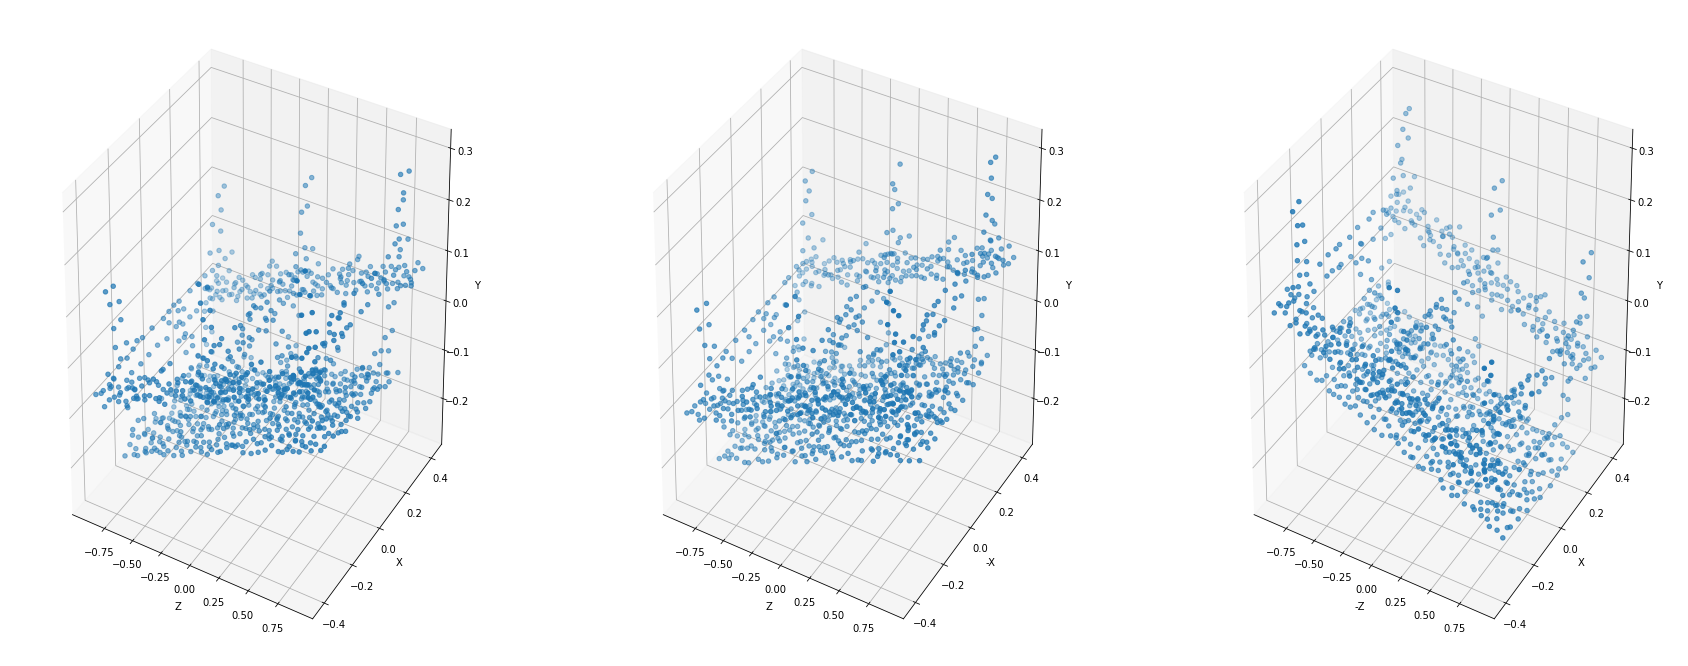

In [ ]:
ptts = modelos[4000]
fig = plt.figure(figsize=(30,12))


ax = fig.add_subplot(1, 3, 1, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]

ax.scatter3D(Z,X,Y)
ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')


ax = fig.add_subplot(1, 3, 2, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]

ax.scatter3D(Z,-X,Y)
ax.set_xlabel('Z')
ax.set_ylabel('-X')
ax.set_zlabel('Y')


ax = fig.add_subplot(1, 3, 3, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]
ax.scatter3D(-Z,X,Y)
ax.set_xlabel('-Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')

plt.show()

#Convertiré el modelo a numpy, le añadiré los ángulos de rotación

In [ ]:
mesaRotados=np.array(modelos)
mesaAngulos=np.array(angulos)

print(mesaRotados.shape)
print(mesaAngulos.shape)

(63504, 1024, 3)
(63504, 3)


#Otros modelos

##Radio

In [ ]:
ptts = np.loadtxt('./data/radio/radio_0004.txt', delimiter=',', usecols=(0,1,2))

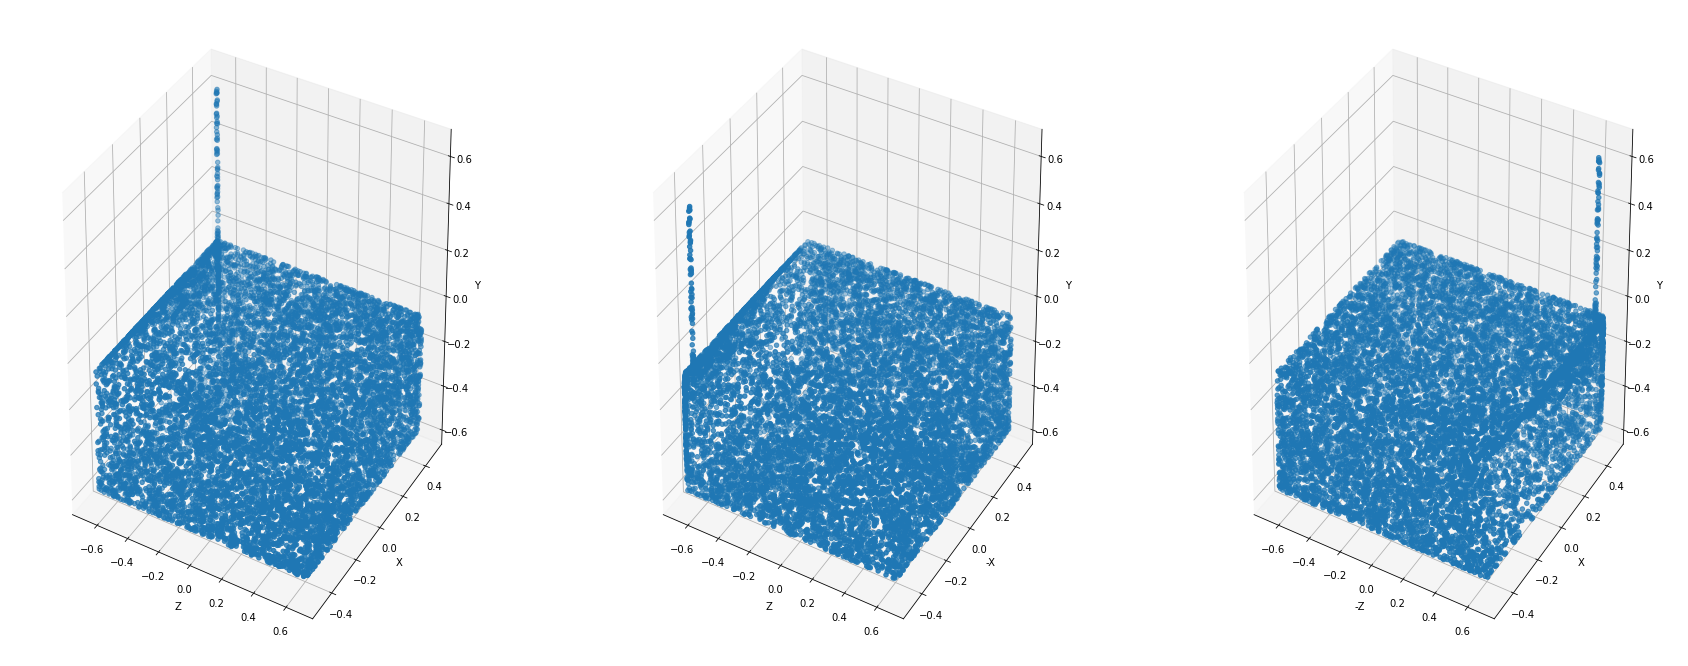

In [ ]:
fig = plt.figure(figsize=(30,12))


ax = fig.add_subplot(1, 3, 1, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]

ax.scatter3D(Z,X,Y)
ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')


ax = fig.add_subplot(1, 3, 2, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]

ax.scatter3D(Z,-X,Y)
ax.set_xlabel('Z')
ax.set_ylabel('-X')
ax.set_zlabel('Y')


ax = fig.add_subplot(1, 3, 3, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]
ax.scatter3D(-Z,X,Y)
ax.set_xlabel('-Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')

plt.show()

In [ ]:
#Retorna nube normalizada y centrada
ptts,_ = muestro_resimple(ptts,ptts)

In [ ]:
modelos=[]
angulos=[]
initial_angle = (np.pi)/2
final_angle = np.pi

#Se recomienda revisar la distancia entre ángulos en caso de que algo no funcione.

for angle_x in np.arange(initial_angle, final_angle, 0.1): #Cogí pasos de 0.1 radianes porque si no se explota otra vez :(
  for angle_y in np.arange(0, (np.pi)*2, 0.1):
    for angle_z in np.arange(0, (np.pi)*2, 0.1):

      modelo_rotado = np.dot(X_axis_rotation_matrix(angle_x),ptts.T).T
      modelo_rotado = np.dot(Y_axis_rotation_matrix(angle_y),modelo_rotado.T).T
      modelo_rotado = np.dot(Z_axis_rotation_matrix(angle_z),modelo_rotado.T).T

      modelos.append(modelo_rotado)
      angulos.append([angle_x, angle_y, angle_z])

print(len(modelos))
print(len(angulos))

63504
63504


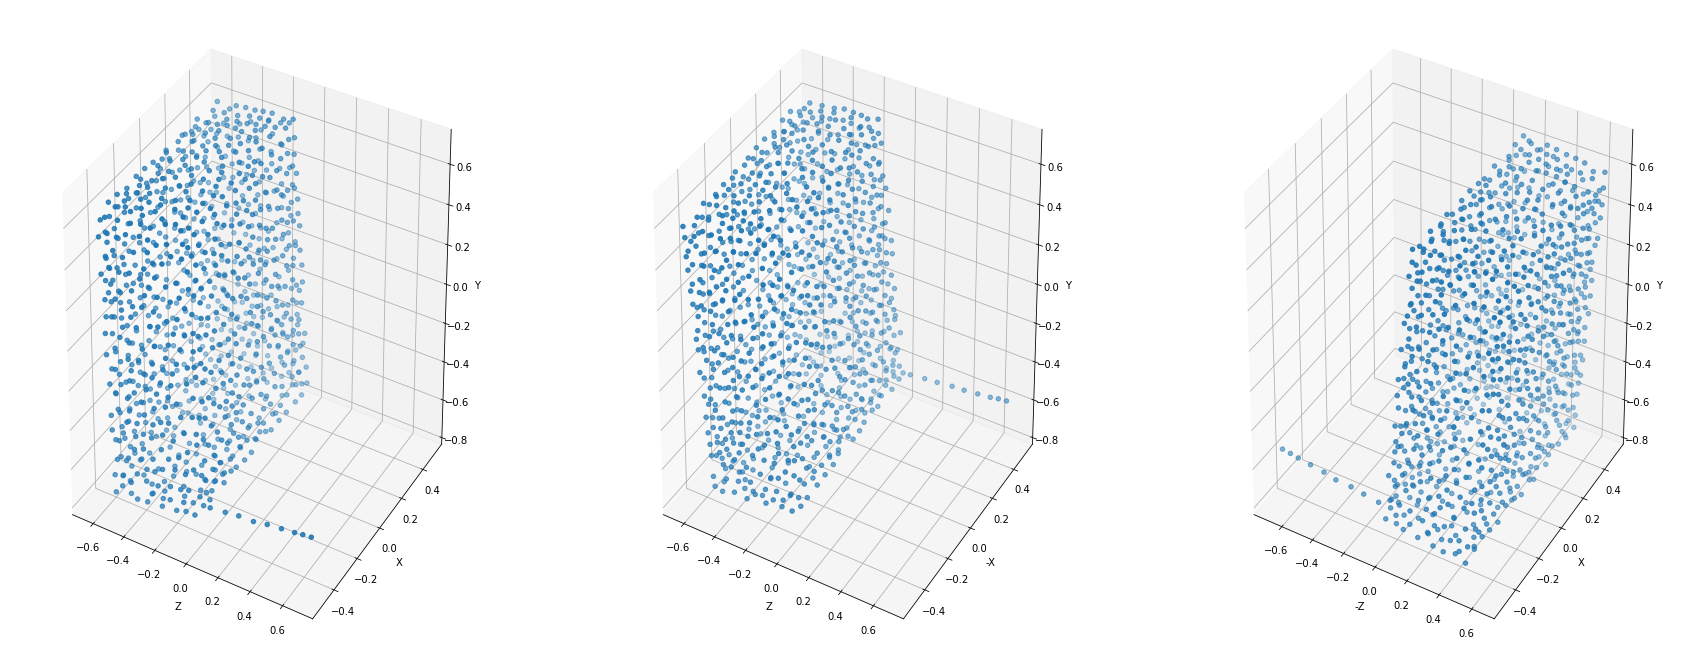

In [ ]:
ptts = modelos[4000]
fig = plt.figure(figsize=(30,12))


ax = fig.add_subplot(1, 3, 1, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]

ax.scatter3D(Z,X,Y)
ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')


ax = fig.add_subplot(1, 3, 2, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]

ax.scatter3D(Z,-X,Y)
ax.set_xlabel('Z')
ax.set_ylabel('-X')
ax.set_zlabel('Y')


ax = fig.add_subplot(1, 3, 3, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]
ax.scatter3D(-Z,X,Y)
ax.set_xlabel('-Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')

plt.show()

In [ ]:
radioRotados=np.array(modelos)
radioAngulos=np.array(angulos)

print(radioRotados.shape)
print(radioAngulos.shape)

(63504, 1024, 3)
(63504, 3)


##Avión

In [ ]:
ptts = np.loadtxt('./data/airplane/airplane_0002.txt', delimiter=',', usecols=(0,1,2))

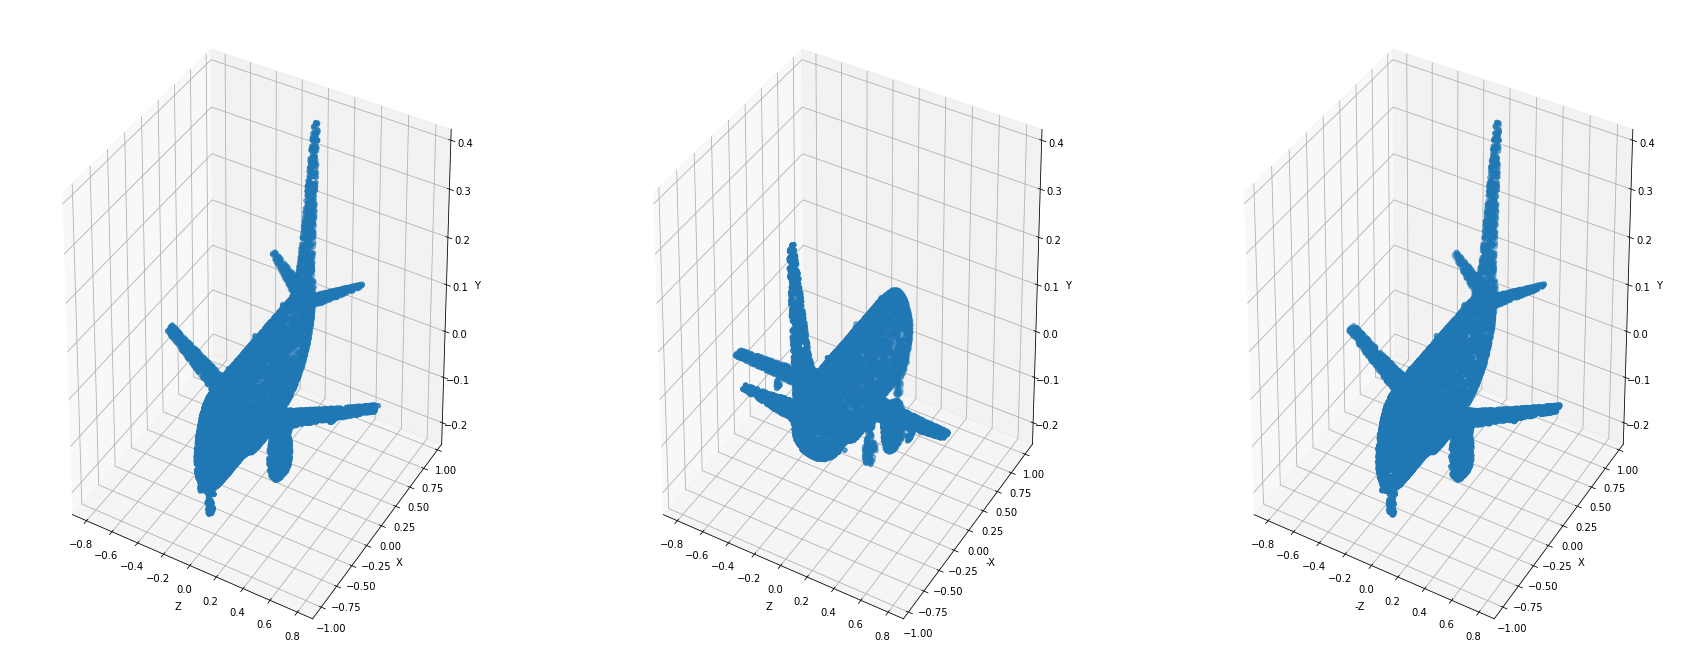

In [ ]:
fig = plt.figure(figsize=(30,12))


ax = fig.add_subplot(1, 3, 1, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]

ax.scatter3D(Z,X,Y)
ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')


ax = fig.add_subplot(1, 3, 2, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]

ax.scatter3D(Z,-X,Y)
ax.set_xlabel('Z')
ax.set_ylabel('-X')
ax.set_zlabel('Y')


ax = fig.add_subplot(1, 3, 3, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]
ax.scatter3D(-Z,X,Y)
ax.set_xlabel('-Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')

plt.show()

In [ ]:
#Retorna nube normalizada y centrada
ptts,_ = muestro_resimple(ptts,ptts)

In [ ]:
modelos=[]
angulos=[]
initial_angle = np.pi
final_angle = ((np.pi)/2)*3

#Se recomienda revisar la distancia entre ángulos en caso de que algo no funcione.

for angle_x in np.arange(initial_angle, final_angle, 0.1): #Cogí pasos de 0.1 radianes porque si no se explota otra vez :(
  for angle_y in np.arange(0, (np.pi)*2, 0.1):
    for angle_z in np.arange(0, (np.pi)*2, 0.1):

      modelo_rotado = np.dot(X_axis_rotation_matrix(angle_x),ptts.T).T
      modelo_rotado = np.dot(Y_axis_rotation_matrix(angle_y),modelo_rotado.T).T
      modelo_rotado = np.dot(Z_axis_rotation_matrix(angle_z),modelo_rotado.T).T

      modelos.append(modelo_rotado)
      angulos.append([angle_x, angle_y, angle_z])

print(len(modelos))
print(len(angulos))

63504
63504


In [ ]:
avionRotados=np.array(modelos)
avionAngulos=np.array(angulos)

print(avionRotados.shape)
print(avionAngulos.shape)

(63504, 1024, 3)
(63504, 3)


##Baño

In [ ]:
ptts = np.loadtxt('./data/toilet/toilet_0001.txt', delimiter=',', usecols=(0,1,2))

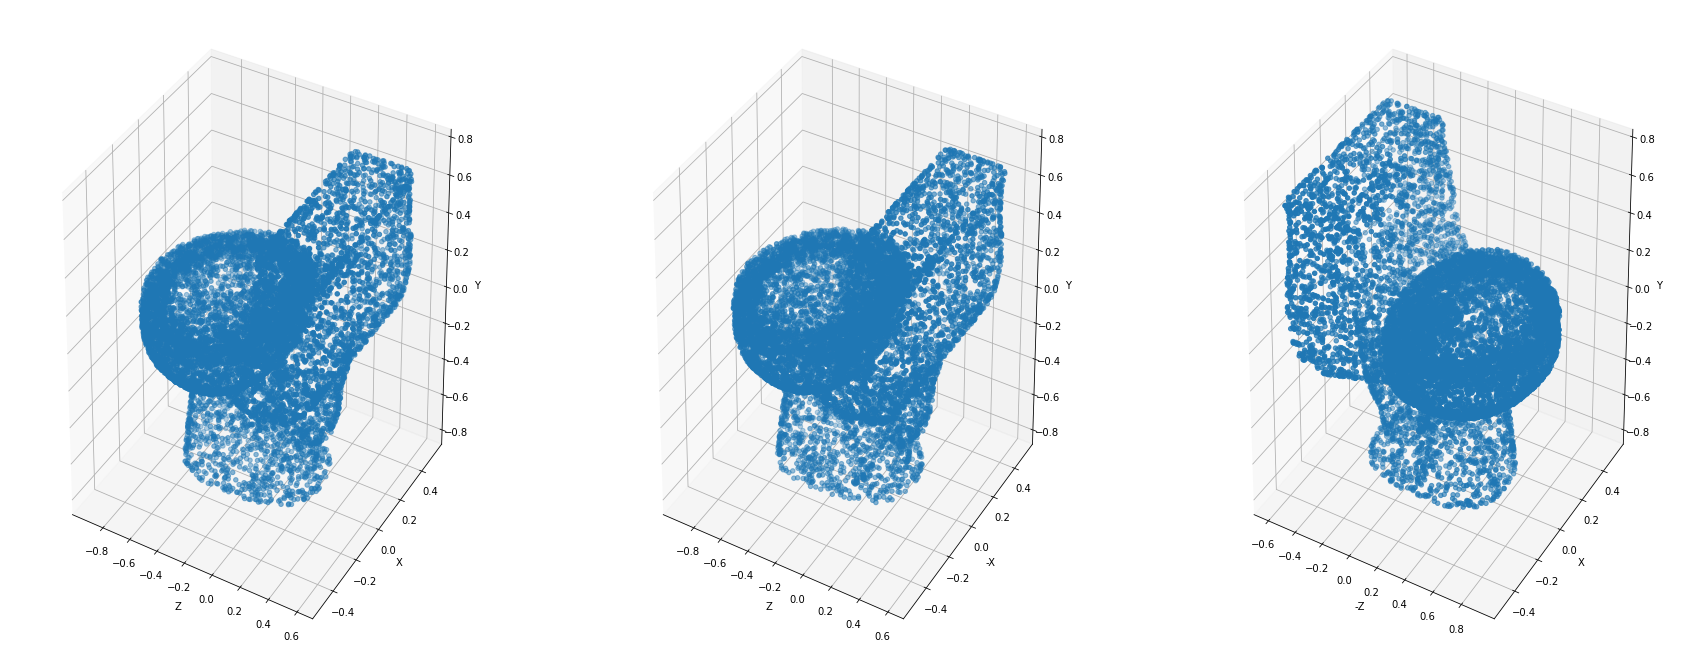

In [ ]:
fig = plt.figure(figsize=(30,12))


ax = fig.add_subplot(1, 3, 1, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]

ax.scatter3D(Z,X,Y)
ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')


ax = fig.add_subplot(1, 3, 2, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]

ax.scatter3D(Z,-X,Y)
ax.set_xlabel('Z')
ax.set_ylabel('-X')
ax.set_zlabel('Y')


ax = fig.add_subplot(1, 3, 3, projection='3d')
X = ptts[:,0]
Y = ptts[:,1]
Z = ptts[:,2]
ax.scatter3D(-Z,X,Y)
ax.set_xlabel('-Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')

plt.show()

In [ ]:
#Retorna nube normalizada y centrada
ptts,_ = muestro_resimple(ptts,ptts)

In [ ]:
modelos=[]
angulos=[]
initial_angle = ((np.pi)/2)*3
final_angle = (np.pi)*2

#Se recomienda revisar la distancia entre ángulos en caso de que algo no funcione.

for angle_x in np.arange(initial_angle, final_angle, 0.1): #Cogí pasos de 0.1 radianes porque si no se explota otra vez :(
  for angle_y in np.arange(0, (np.pi)*2, 0.1):
    for angle_z in np.arange(0, (np.pi)*2, 0.1):

      modelo_rotado = np.dot(X_axis_rotation_matrix(angle_x),ptts.T).T
      modelo_rotado = np.dot(Y_axis_rotation_matrix(angle_y),modelo_rotado.T).T
      modelo_rotado = np.dot(Z_axis_rotation_matrix(angle_z),modelo_rotado.T).T

      modelos.append(modelo_rotado)
      angulos.append([angle_x, angle_y, angle_z])

print(len(modelos))
print(len(angulos))

63504
63504


In [ ]:
banioRotados=np.array(modelos)
banioAngulos=np.array(angulos)

print(banioRotados.shape)
print(banioAngulos.shape)

#banio = np.concatenate((banioAngulos, banioRotados))
#banio = np.concatenate((banioRotados, banioAngulos), axis = 1)



(63504, 1024, 3)
(63504, 3)


In [ ]:
#modelos = np.concatenate((mesaRotados, radioRotados, avionRotados, banioRotados))
#angulos = np.concatenate((mesaAngulos, radioAngulos, avionAngulos, banioAngulos))

#Version resumida y optimizada

##Mesa

In [ ]:
ptts = np.loadtxt('./data/table/table_0008.txt', delimiter=',', usecols=(0,1,2))

NameError: ignored

In [ ]:
#Retorna nube normalizada y centrada
ptts,_ = muestro_resimple(ptts,ptts)

In [ ]:
modelos=[]
angulos=[]
initial_angle = 0
final_angle = (np.pi)/2

#Se recomienda revisar la distancia entre ángulos en caso de que algo no funcione.

for angle_x in np.arange(initial_angle, final_angle, 0.1): #Cogí pasos de 0.1 radianes porque si no se explota otra vez :(
  for angle_y in np.arange(0, (np.pi)*2, 0.1):
    for angle_z in np.arange(0, (np.pi)*2, 0.1):

      modelo_rotado = np.dot(X_axis_rotation_matrix(angle_x),ptts.T).T
      modelo_rotado = np.dot(Y_axis_rotation_matrix(angle_y),modelo_rotado.T).T
      modelo_rotado = np.dot(Z_axis_rotation_matrix(angle_z),modelo_rotado.T).T

      modelos.append(modelo_rotado)
      angulos.append([angle_x, angle_y, angle_z])

print(len(modelos))
print(len(angulos))

63504
63504


In [ ]:
modelosRotados=np.array(modelos)
modelosAngulos=np.array(angulos)

print(modelosRotados.shape)
print(modelosAngulos.shape)

(63504, 1024, 3)
(63504, 3)


In [ ]:
#Guardo los ángulos de rotación
with open("angulos_modelo_rotado1.txt", 'w') as output:
    for row in angulos:
      output.write(str(row[0]) + ',' + str(row[1]) + ',' + str(row[2]) + '\n')

In [ ]:
with open("modelos_rotado1.txt", 'w') as output:
    for modelo in modelos:
      for puntos in modelo:
        output.write(str(puntos[0]) + ',' + str(puntos[1]) + ',' + str(puntos[2]) + '\n')
        #output.write(str(puntos[0]) + '\n')

In [ ]:
DPDist_numbers=[1,2,3,4,5]

with open("ejemplo.txt", 'w') as output:
      for value in DPDist_numbers:
        output.write(str(value) + '\n')

In [ ]:
ejemploCargados = np.loadtxt('./ejemplo.txt')
for i in range(len(ejemploCargados)):
  print(type(i))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


In [ ]:
#angulosCargados = np.loadtxt('./file.txt')
angulosCargados = np.loadtxt('./angulos_modelo_rotado1.txt', delimiter=',', usecols=(0,1,2))

In [ ]:
len(angulosCargados)
angulosCargados
angulos = np.array(angulosCargados)
#angulos.reshape(int(len(angulosCargados)/3),3)
angulos.shape

(63504, 3)

##Radio

In [ ]:
ptts = np.loadtxt('./data/radio/radio_0004.txt', delimiter=',', usecols=(0,1,2))

In [ ]:
#Retorna nube normalizada y centrada
ptts,_ = muestro_resimple(ptts,ptts)

In [ ]:
modelos=[]
angulos=[]
initial_angle = (np.pi)/2
final_angle = np.pi

#Se recomienda revisar la distancia entre ángulos en caso de que algo no funcione.

for angle_x in np.arange(initial_angle, final_angle, 0.1): #Cogí pasos de 0.1 radianes porque si no se explota otra vez :(
  for angle_y in np.arange(0, (np.pi)*2, 0.1):
    for angle_z in np.arange(0, (np.pi)*2, 0.1):

      modelo_rotado = np.dot(X_axis_rotation_matrix(angle_x),ptts.T).T
      modelo_rotado = np.dot(Y_axis_rotation_matrix(angle_y),modelo_rotado.T).T
      modelo_rotado = np.dot(Z_axis_rotation_matrix(angle_z),modelo_rotado.T).T

      modelos.append(modelo_rotado)
      angulos.append([angle_x, angle_y, angle_z])

print(len(modelos))
print(len(angulos))

63504
63504


In [ ]:
modelosRotados = np.concatenate((modelosRotados,np.array(modelos)))
modelosAngulos = np.concatenate((modelosAngulos,np.array(angulos)))

print(modelosRotados.shape)
print(modelosAngulos.shape)

(127008, 1024, 3)
(127008, 3)


##Avión

In [ ]:
ptts = np.loadtxt('./data/airplane/airplane_0002.txt', delimiter=',', usecols=(0,1,2))

In [ ]:
#Retorna nube normalizada y centrada
ptts,_ = muestro_resimple(ptts,ptts)

In [ ]:
modelos=[]
angulos=[]
initial_angle = np.pi
final_angle = ((np.pi)/2)*3

#Se recomienda revisar la distancia entre ángulos en caso de que algo no funcione.

for angle_x in np.arange(initial_angle, final_angle, 0.1): #Cogí pasos de 0.1 radianes porque si no se explota otra vez :(
  for angle_y in np.arange(0, (np.pi)*2, 0.1):
    for angle_z in np.arange(0, (np.pi)*2, 0.1):

      modelo_rotado = np.dot(X_axis_rotation_matrix(angle_x),ptts.T).T
      modelo_rotado = np.dot(Y_axis_rotation_matrix(angle_y),modelo_rotado.T).T
      modelo_rotado = np.dot(Z_axis_rotation_matrix(angle_z),modelo_rotado.T).T

      modelos.append(modelo_rotado)
      angulos.append([angle_x, angle_y, angle_z])

print(len(modelos))
print(len(angulos))

63504
63504


In [ ]:
modelosRotados = np.concatenate((modelosRotados,np.array(modelos)))
modelosAngulos = np.concatenate((modelosAngulos,np.array(angulos)))

print(modelosRotados.shape)
print(modelosAngulos.shape)

(190512, 1024, 3)
(190512, 3)


##Baño

In [ ]:
ptts = np.loadtxt('./data/toilet/toilet_0001.txt', delimiter=',', usecols=(0,1,2))

In [ ]:
#Retorna nube normalizada y centrada
ptts,_ = muestro_resimple(ptts,ptts)

In [ ]:
modelos=[]
angulos=[]
initial_angle = ((np.pi)/2)*3
final_angle = (np.pi)*2

#Se recomienda revisar la distancia entre ángulos en caso de que algo no funcione.

for angle_x in np.arange(initial_angle, final_angle, 0.1): #Cogí pasos de 0.1 radianes porque si no se explota otra vez :(
  for angle_y in np.arange(0, (np.pi)*2, 0.1):
    for angle_z in np.arange(0, (np.pi)*2, 0.1):

      modelo_rotado = np.dot(X_axis_rotation_matrix(angle_x),ptts.T).T
      modelo_rotado = np.dot(Y_axis_rotation_matrix(angle_y),modelo_rotado.T).T
      modelo_rotado = np.dot(Z_axis_rotation_matrix(angle_z),modelo_rotado.T).T

      modelos.append(modelo_rotado)
      angulos.append([angle_x, angle_y, angle_z])

print(len(modelos))
print(len(angulos))

63504
63504


In [ ]:
modelosRotados = np.concatenate((modelosRotados,np.array(modelos)))
modelosAngulos = np.concatenate((modelosAngulos,np.array(angulos)))

print(modelosRotados.shape)
print(modelosAngulos.shape)

#banio = np.concatenate((banioAngulos, banioRotados))
#banio = np.concatenate((banioRotados, banioAngulos), axis = 1)

